In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Investigation of structure and quality

In [2]:
#load dataset
df = pd.read_csv('./loan_data_2007_2014.csv')
df.head()

/shared-libs/python3.10/py-core/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Structure investigation

In [3]:
df.shape

(466285, 75)

In [4]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [5]:
pd.value_counts(df.dtypes)

float64    46
object     22
int64       7
dtype: int64

Structure of non-numerical features

In [6]:
df.select_dtypes(exclude="number").head()
#Tipe data pada kolom term dapat diubah menjadi integer

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [7]:
df.describe(exclude='number').transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


Data tidak unik (atau hampir seluruhnya berbeda)

=> Data yang memiliki nilai unik dihampir hingga puluhan ribu atau hanya memiliki 1 nilai

Kolom => url, application_type, emp_title

Data yang tidak relevan 

=> Data yang tidak relevan dengan status pinjaman atau fitur yang memiliki perbandingan nilai didalamnya terlalu besar

Kolom => desc, zip_code, title, pymnt_plan, sub_grade

Structure of numerical features

<AxesSubplot: title={'center': 'Unique value per features'}>

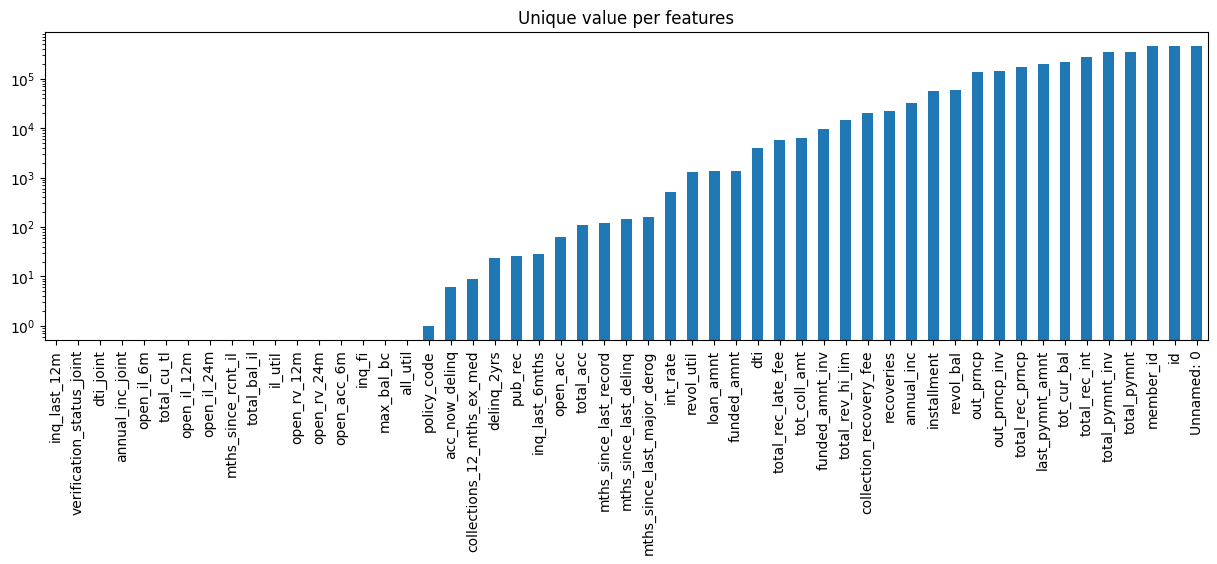

In [8]:
# Menghitung nilai unik untuk setiap atribut number
unique_val = df.select_dtypes(include="number").nunique().sort_values()
# Plot informasi dengan y-axis dalam skala log
unique_val.plot.bar(logy=True, figsize=(15,4), title="Unique value per features")

Data tidak unik (atau hampir seluruhnya berbeda)

In [9]:
# deskripsi data numerikal dengan persentil
pct_num_list = [i/10 for i in range(1, 10)]
df.describe(include="number", percentiles=pct_num_list).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,46628.400,9.325680e+04,139885.200,186513.600,2.331420e+05,2.797704e+05,3.263988e+05,3.730272e+05,4.196556e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,1126000.600,2.307213e+06,5244907.600,7297077.800,1.010790e+07,1.304767e+07,1.792398e+07,2.396333e+07,3.119653e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,1357865.800,2.637302e+06,6332237.200,8735852.600,1.194108e+07,1.502828e+07,1.997604e+07,2.632648e+07,3.376061e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,5000.000,7.000000e+03,9000.000,10075.000,1.200000e+04,1.500000e+04,1.800000e+04,2.100000e+04,2.600000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,5000.000,7.000000e+03,9000.000,10050.000,1.200000e+04,1.500000e+04,1.800000e+04,2.097500e+04,2.600000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,5000.000,7.000000e+03,9000.000,10000.000,1.200000e+04,1.500000e+04,1.800000e+04,2.080000e+04,2.600000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,7.900,9.910000e+00,11.490,12.490,1.366000e+01,1.449000e+01,1.580000e+01,1.757000e+01,1.952000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,163.080,2.263700e+02,281.620,331.890,3.798900e+02,4.496340e+02,5.185080e+02,6.227120e+02,7.736760e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,34000.000,4.160000e+04,49000.000,55000.000,6.300000e+04,7.100000e+04,8.100000e+04,9.600000e+04,1.200000e+05,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,7.030,1.011000e+01,12.530,14.710,1.687000e+01,1.908000e+01,2.146000e+01,2.421000e+01,2.800000e+01,3.999000e+01


Kesimpulan:

- kolom tidak relevan: unnamed: 0(index), id, member_id, desc, zip_code

- data tidak unik (atau berbeda seluruhnya): url, application_type(hanya memiliki 1 nilai)

Kolom diatas dapat dihilangkan.

### 2. Quality Investigation

Menginvestigasi kualitas umum data yang berhubungan dengan duplikat, missing value, dan entri yang tidak diinginkan.

Data Duplicates

In [10]:
print('id',df['id'].nunique())
print('member id',df['member_id'].nunique())

id 466285
member id 466285


Tidak ada data duplikat.

Missing Values

In [11]:
(df.isna().mean()*100).sort_values(ascending=False).head(25)

inq_last_12m                   100.000000
total_bal_il                   100.000000
dti_joint                      100.000000
verification_status_joint      100.000000
annual_inc_joint               100.000000
open_acc_6m                    100.000000
open_il_6m                     100.000000
open_il_12m                    100.000000
open_il_24m                    100.000000
mths_since_rcnt_il             100.000000
il_util                        100.000000
open_rv_24m                    100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
max_bal_bc                     100.000000
all_util                       100.000000
open_rv_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal                     15.071469
tot_coll_amt                    15

Banyak fitur yang memiliki missing value lebih dari 50%. Perbedaan signifikan terlihat pada 15% dan 48%

Kesimpulan:

- Tidak ada data duplikat

- Data dengan missing value lebih dari 20% dapat dihapus.

Delete unwanted data based on structured and quality.

In [12]:
#Drop non-relevant and non-unique features
col = ['Unnamed: 0', 'id','member_id', 'desc', 'zip_code', 'url','application_type', 'emp_title', 'title', 'pymnt_plan', 'policy_code', 'sub_grade']
df.drop(col, axis=1, inplace= True)

In [13]:
#Drop missing values
missing_values = df.isna().mean()*100
col_missingvalues = missing_values[missing_values > 40].index
col_missingvalues

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [14]:
df.drop(col_missingvalues, axis = 1, inplace = True)

## Identification of target variables

Tujuan utama project credit risk modeling adalah melakukan prediksi terhadap kemampuan suatu individu untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Sehingga variabel target yang digunakan harus menunjukkan kemampuan individu dalam hal tersebut.

Dalam loan dataset, variabel loan_status adalah variabel yang dapat dijadikan variabel target karena menunjukkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [15]:
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Membagi status pinjaman menjadi 2, yaitu status buruk dan baik. Pinjaman dengan value charged off, late, dan default akan masuk kategori status pinjaman buruk(bad loan). Sisanya akan masuk status baik.

In [16]:
#Split loan status
bad_loan = ['Charged Off', 'Default' , 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
df['bad_loan'] = np.where(df['loan_status'].isin(bad_loan), 1, 0)

#Drop kolom 'loan_status'
df.drop(columns = ['loan_status'], inplace = True)

In [17]:
df['bad_loan'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_loan, dtype: float64

## Data Cleaning

Variable Screening

In [18]:
#Cek dimensi data setelah investigasi
df.shape

(466285, 42)

In [19]:
df.iloc[:,0:11].head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified


In [20]:
df.iloc[:,11:22].head(5)

,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util
0,Dec-11,credit_card,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7
1,Dec-11,car,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4
2,Dec-11,small_business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5
3,Dec-11,other,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0
4,Dec-11,other,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9


In [21]:
df.iloc[:,22:33].head(5)

,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
0,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00
1,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11
2,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00
3,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00
4,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00


In [22]:
df.iloc[:,33:44].head(5)

,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
0,Jan-15,171.62,Jan-16,0.0,0.0,NaN,NaN,NaN,0
1,Apr-13,119.66,Sep-13,0.0,0.0,NaN,NaN,NaN,1
2,Jun-14,649.91,Jan-16,0.0,0.0,NaN,NaN,NaN,0
3,Jan-15,357.48,Jan-15,0.0,0.0,NaN,NaN,NaN,0
4,Jan-16,67.79,Jan-16,0.0,0.0,NaN,NaN,NaN,0


term

Mengubah tipe data menjadi float (36 atau 60)

In [23]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

emp_length

In [24]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Mengubah label menjadi numerik 

In [25]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

df['emp_length_int'] = df['emp_length_int'].astype(float)
df.drop('emp_length', axis=1, inplace=True)

/tmp/ipykernel_198/2101240511.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


Mengganti seluruh fitur tipe tanggal menjadi datetime

issue_d

Bulan saat pinjaman cair

In [26]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

#Selisih terhitung hingga Juni 2023
df['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-06-24') - df['issue_d']) / np.timedelta64(1, 'M')))

df.drop('issue_d', axis=1, inplace=True)

earlist_cr_line

Bulan jalur kredit yang paling awal yang dilaporkan peminjam dibuka

In [27]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

#Selisih terhitung hingga Juni 2023
df['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-06-24') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df.loc[df['months_since_earliest_cr_line']<0, 'months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'].max()
df.drop(['earliest_cr_line'], axis=1, inplace=True)

last_payment_d

Bulan saat pembayaran terakhir diterima

In [28]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

#Selisih terhitung hingga Juni 2023
df['months_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2023-06-24') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
df.drop('last_pymnt_d', axis=1, inplace=True)

last_credit_pull_d

Bulan terakhir penarikan kredit pinjaman

In [29]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

#Selisih terhitung hingga Juni 2023
df['months_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2023-06-24') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df.drop('last_credit_pull_d', axis=1, inplace=True)

### Mengisi missing values

In [30]:
#Melihat banyaknya kolom dengan missing value
#Numerik
num_data = df.select_dtypes(include='number')
miss_num = num_data.isna().mean()*100
col_mis_num = miss_num[miss_num > 0].index
print(len(col_mis_num))

#Kategorik
cat_data = df.select_dtypes(exclude='number')
miss_cat = cat_data.isna().mean()*100
col_mis_kat = miss_cat[miss_cat > 0].index
print(len(col_mis_kat))

16
0


Melihat distribusi data

/tmp/ipykernel_198/1347956356.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data[j],color='red')
/tmp/ipykernel_198/1347956356.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data[j],color='red')
/tmp/ipykernel_198/1347956356.py:4: UserWarning: 

`distplot` is a deprecated func

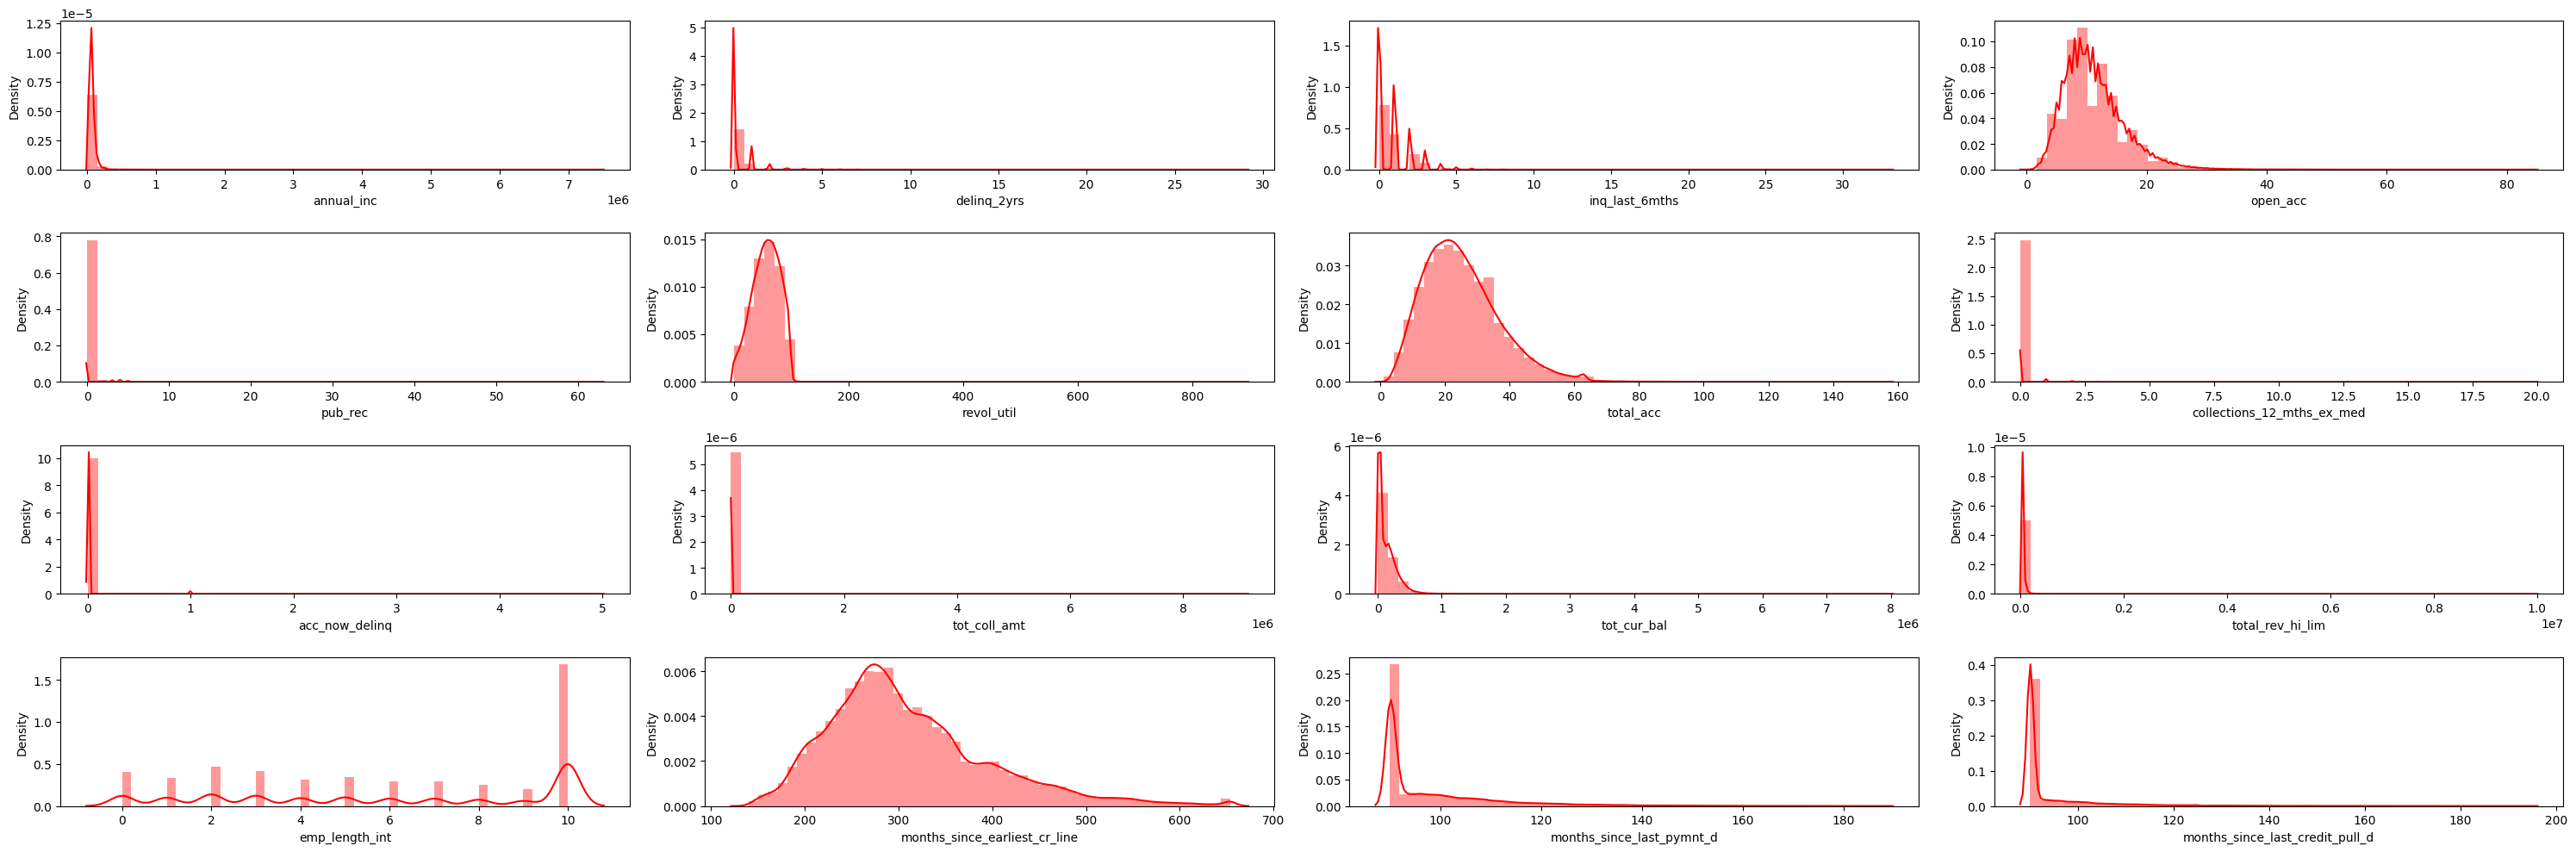

In [31]:
plt.figure(figsize=(30,10))
for i,j in enumerate(col_mis_num):
  plt.subplot(4,4,i+1)
  sns.distplot(num_data[j],color='red')
  plt.tight_layout()

Mengisi missing value dengan median atau modus berdasarkan distribusi data

In [32]:
fill_withmedian =  ['open_acc', 'revol_util', 'total_acc', 'tot_cur_bal', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_last_credit_pull_d']
fill_withmodus = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim', 'emp_length_int', 'collections_12_mths_ex_med']

for i in fill_withmedian:
  df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].median()

for j in fill_withmodus:
  df.loc[df.loc[:,j].isnull(),j] = df.loc[:,j].mode()[0]

#check ulang missing value
df.isna().mean()*100

loan_amnt                          0.0
funded_amnt                        0.0
funded_amnt_inv                    0.0
term                               0.0
int_rate                           0.0
installment                        0.0
grade                              0.0
home_ownership                     0.0
annual_inc                         0.0
verification_status                0.0
purpose                            0.0
addr_state                         0.0
dti                                0.0
delinq_2yrs                        0.0
inq_last_6mths                     0.0
open_acc                           0.0
pub_rec                            0.0
revol_bal                          0.0
revol_util                         0.0
total_acc                          0.0
initial_list_status                0.0
out_prncp                          0.0
out_prncp_inv                      0.0
total_pymnt                        0.0
total_pymnt_inv                    0.0
total_rec_prncp          

Mengatasi Outlier

In [33]:
from scipy import stats

num = df.select_dtypes(exclude='object')
cat = df.select_dtypes(include='object')

num = num[(np.abs(stats.zscore(num)) < 3).all(axis=1)]
df = num.join(cat)
df.shape

(357178, 42)

Memeriksa kembali nilai unik pada fitur numerik

In [34]:
numerik = df.select_dtypes(include='number')
print("variabel => nilai unik")
for i in numerik.columns:
  print('{} => {}'.format(i, df[i].nunique()))

variabel => nilai unik
loan_amnt => 1269
funded_amnt => 1270
funded_amnt_inv => 3863
term => 2
int_rate => 322
installment => 46350
annual_inc => 25242
dti => 3996
delinq_2yrs => 3
inq_last_6mths => 5
open_acc => 27
pub_rec => 2
revol_bal => 46425
revol_util => 1186
total_acc => 58
out_prncp => 112381
out_prncp_inv => 116563
total_pymnt => 270882
total_pymnt_inv => 268043
total_rec_prncp => 135507
total_rec_int => 214757
total_rec_late_fee => 905
recoveries => 10138
collection_recovery_fee => 9336
last_pymnt_amnt => 154596
collections_12_mths_ex_med => 1
acc_now_delinq => 1
tot_coll_amt => 5326
tot_cur_bal => 179559
total_rev_hi_lim => 10294
bad_loan => 2
emp_length_int => 11
months_since_issue_d => 59
months_since_earliest_cr_line => 429
months_since_last_pymnt_d => 47
months_since_last_credit_pull_d => 33


Terdapat fitur yang memiliki nilai unik hanya 1, sehingga perlu didrop saja.

In [35]:
col_convert = ['term','pub_rec','delinq_2yrs','inq_last_6mths']

for i in col_convert:
  df[i] = df[i].astype(str)

df.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis = 1, inplace =True)

## Exploratory Data Analysis

In [36]:
df.loc[df['bad_loan']==0,'status']='Lunas'
df.loc[df['bad_loan']==1,'status']='Tidak Lunas'

Plot distribusi data numerik

/tmp/ipykernel_198/2352726099.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data[num_data.columns[i]],color='red')
/tmp/ipykernel_198/2352726099.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data[num_data.columns[i]],color='red')
/tmp/ipykernel_198/2352726099.py:7: UserWarnin

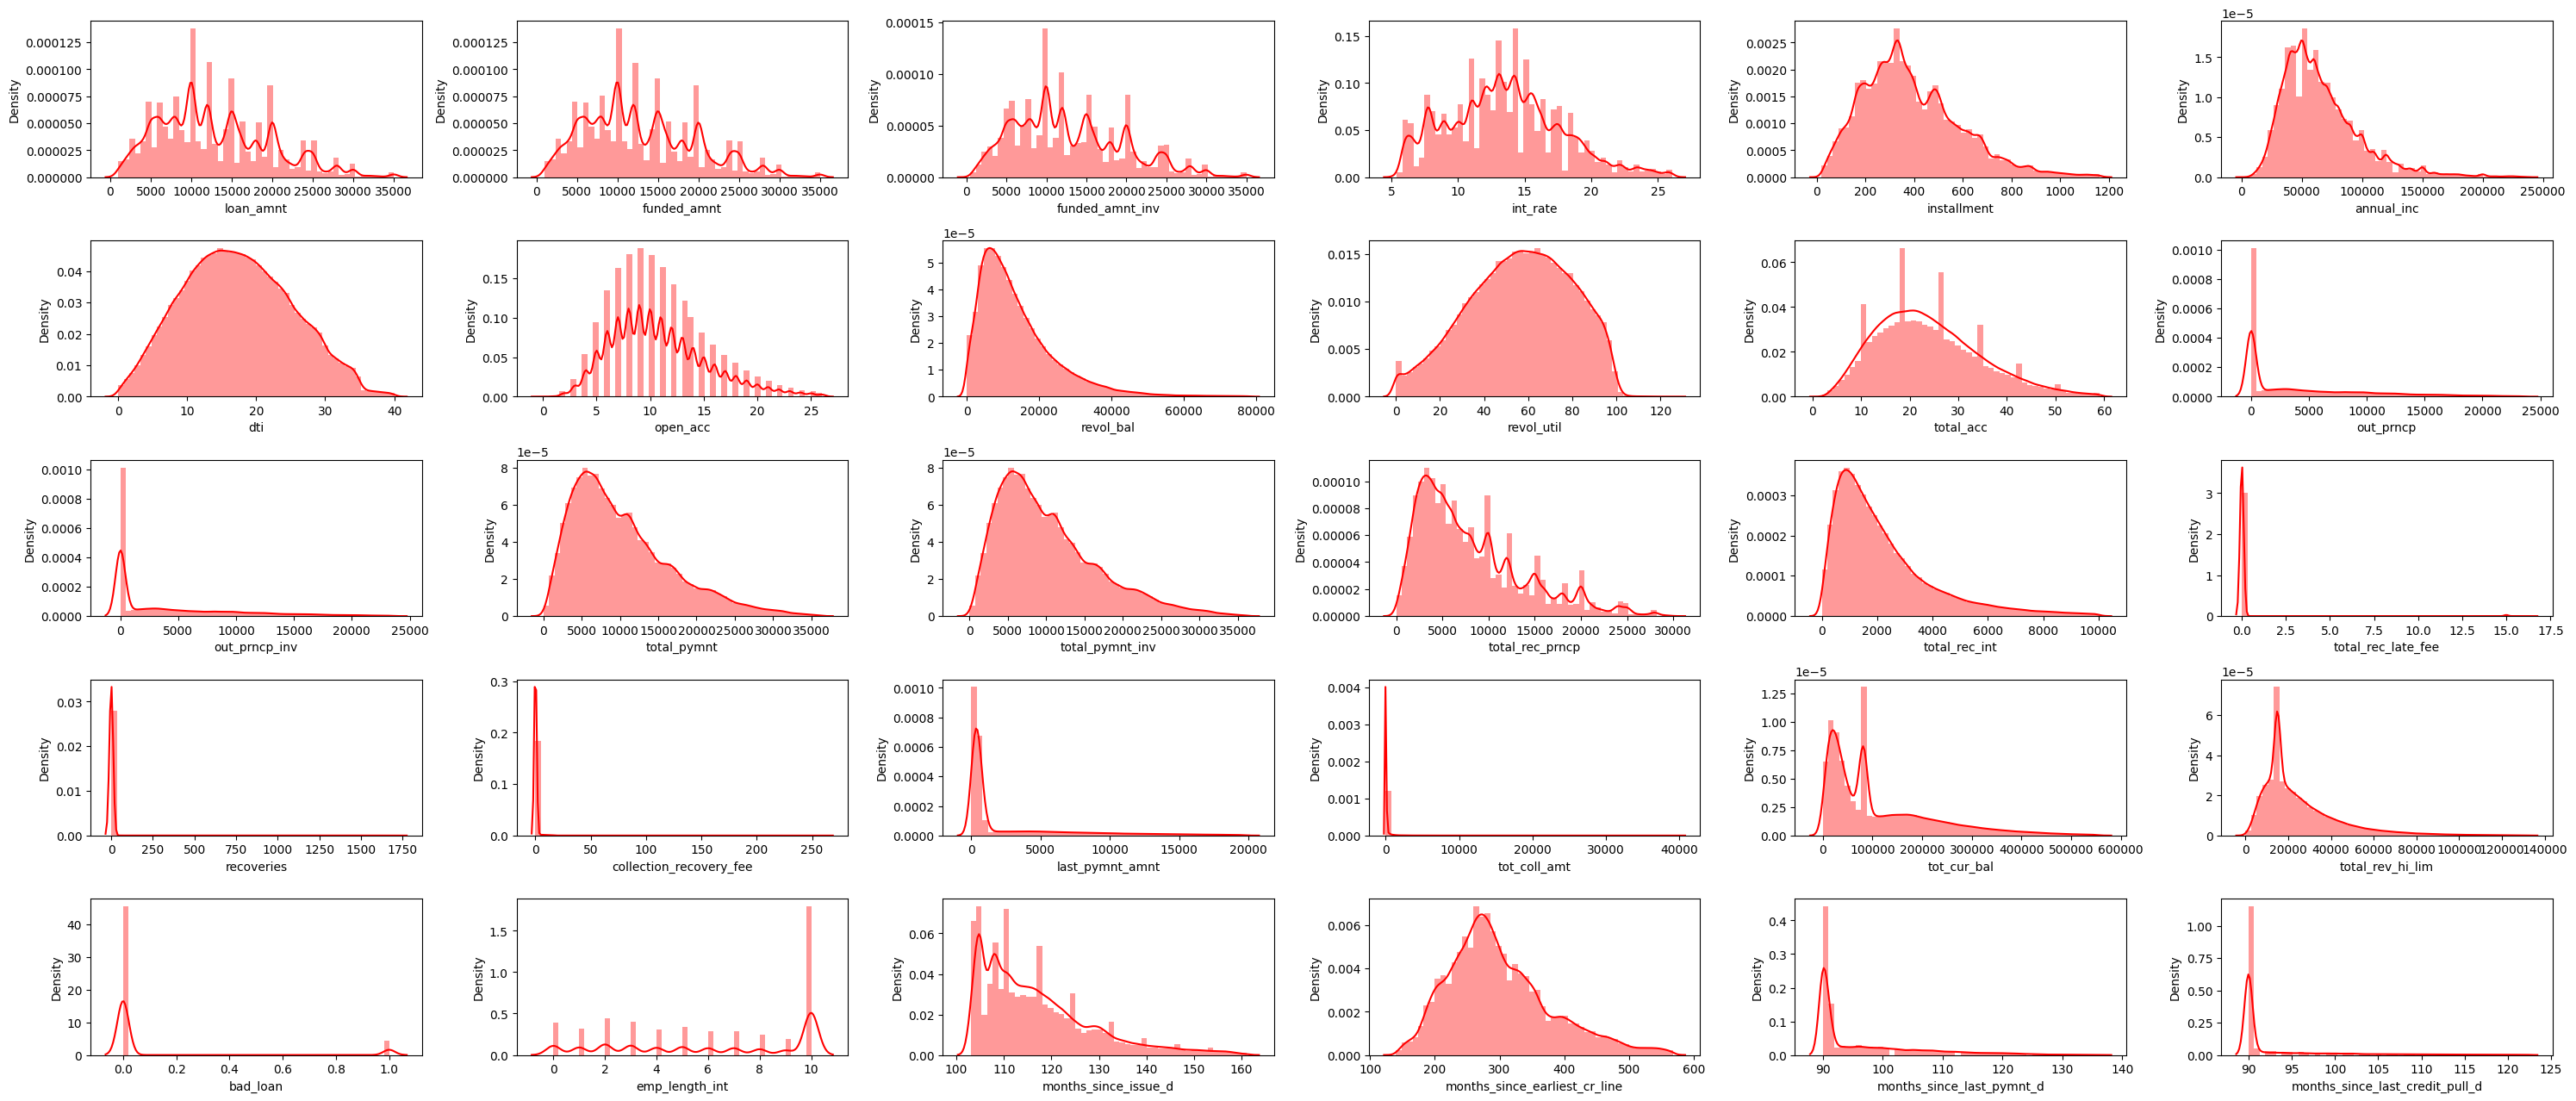

In [37]:
num_data = df.select_dtypes(include='number')
col = num_data.columns

plt.figure(figsize=(30,15))
for i in range(0,len(col)):
  plt.subplot(6,6,i+1)
  sns.distplot(num_data[num_data.columns[i]],color='red')
  plt.tight_layout()

In [38]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,357178.0,12788.798232,6783.512118,1000.00,7600.0000,12000.000,17500.0000,35000.0000
funded_amnt,357178.0,12771.271327,6769.702473,1000.00,7575.0000,12000.000,17475.0000,35000.0000
funded_amnt_inv,357178.0,12757.886693,6764.234083,500.00,7550.0000,11975.000,17450.0000,35000.0000
int_rate,357178.0,13.469328,4.194683,5.42,10.4900,13.350,16.2000,26.0600
installment,357178.0,389.494158,199.823028,19.87,245.5100,354.315,505.3400,1162.4300
annual_inc,357178.0,65562.178160,31995.894778,3000.00,43000.0000,60000.000,80000.0000,238000.0000
dti,357178.0,17.383684,7.831606,0.00,11.5200,17.010,22.9500,39.9900
open_acc,357178.0,10.788920,4.463947,0.00,8.0000,10.000,13.0000,26.0000
revol_bal,357178.0,13852.593127,10723.989953,0.00,6291.0000,11121.000,18417.0000,78213.0000
revol_util,357178.0,56.348031,23.225216,0.00,39.8000,57.600,74.4000,125.8000


In [39]:
df['total_rec_late_fee_label'] = np.where(df['total_rec_late_fee']==0, 'None', 'Paid')
df['collection_recovery_fee_label'] = np.where(df['collection_recovery_fee']==0, 'None', 'Paid')
df['tot_coll_amt_label'] = np.where(df['tot_coll_amt']==0, 'None', 'Paid')
df['recoveries_label'] = np.where(df['recoveries']==0, 'None', 'Paid')

df.drop(['total_rec_late_fee','recoveries','collection_recovery_fee','tot_coll_amt'], axis=1, inplace=True)

Plot distribusi data kategorikal

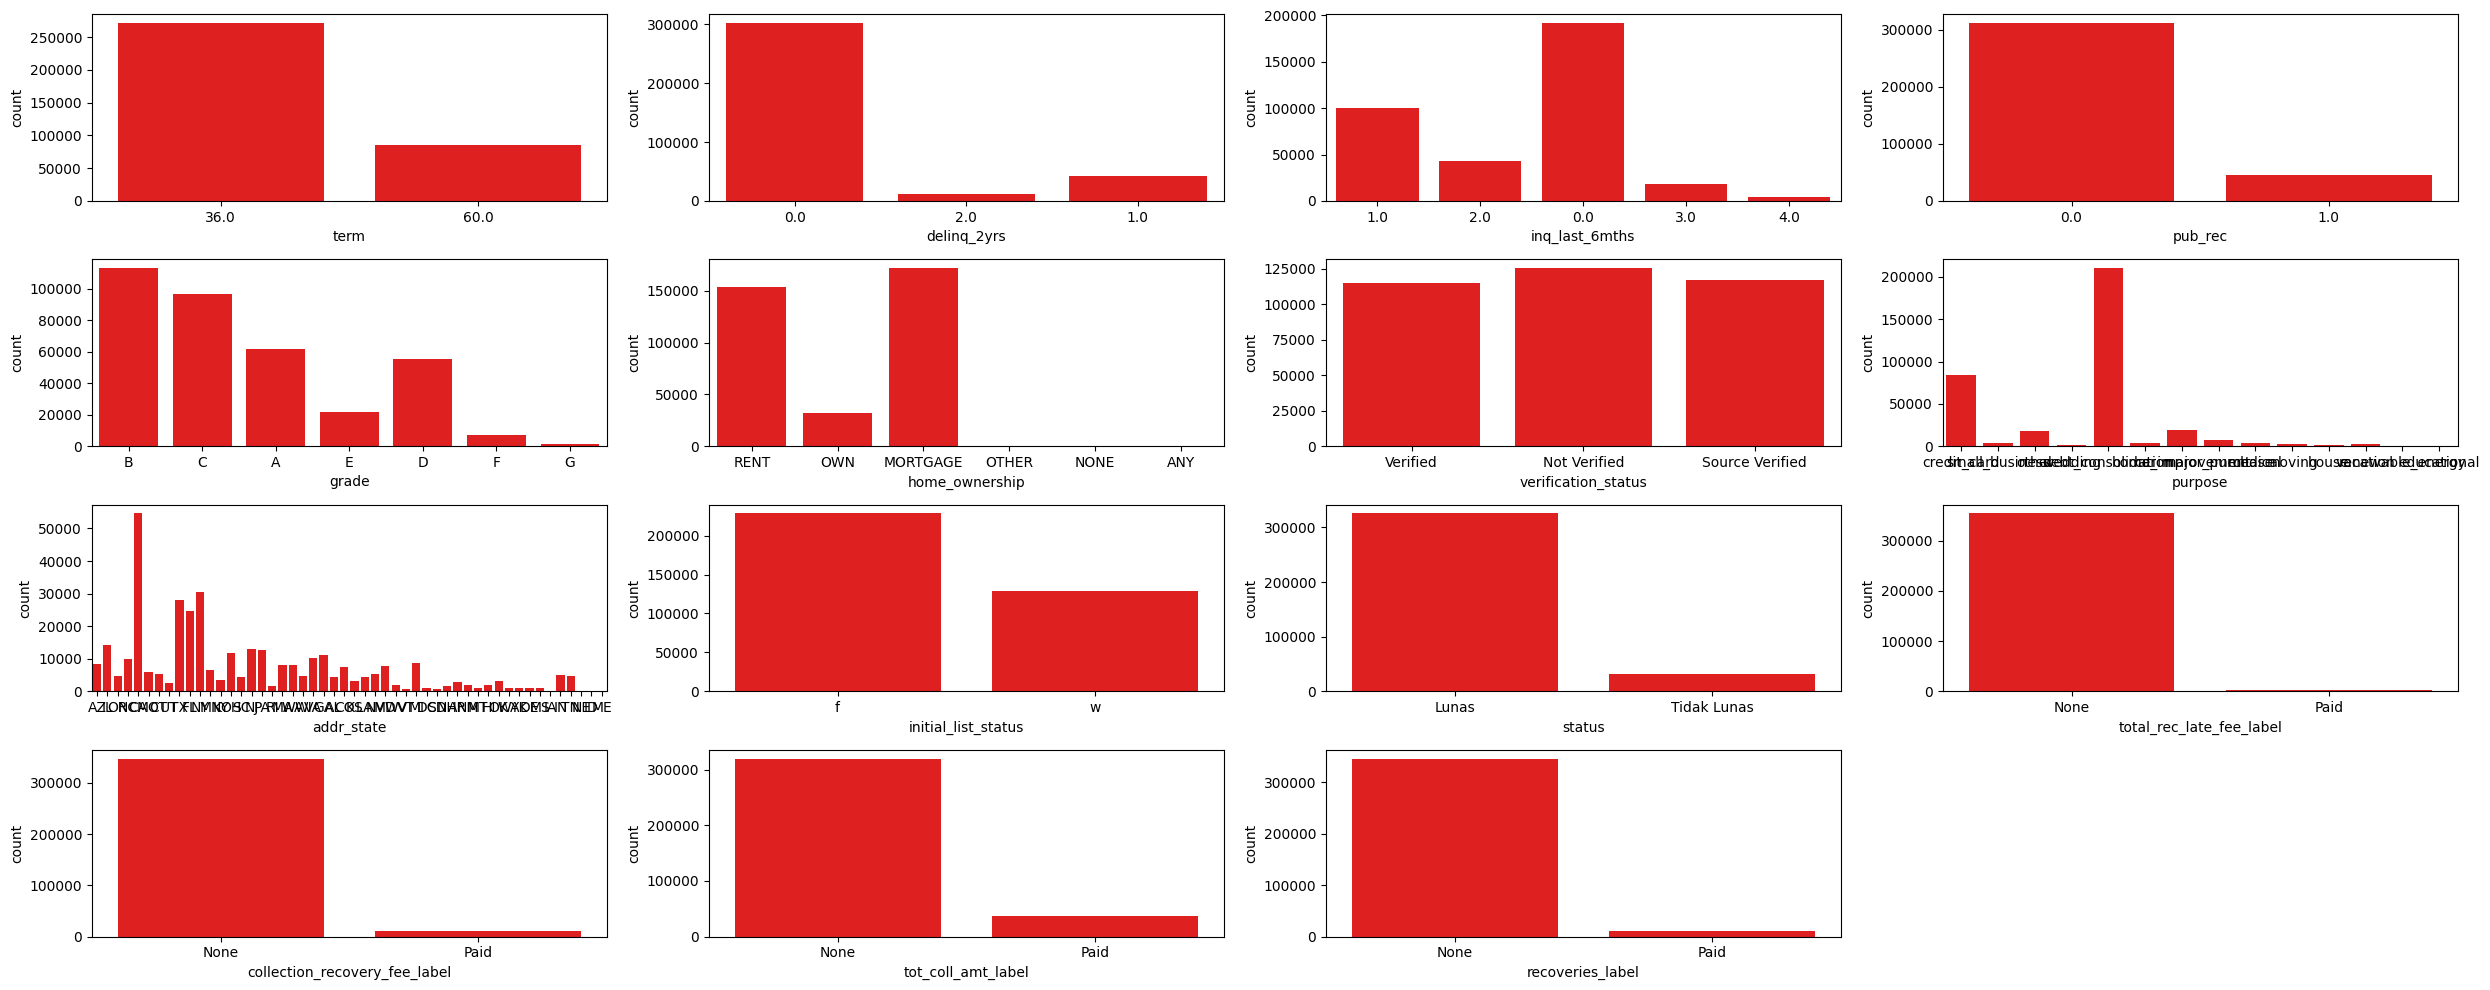

In [40]:
cat_data = df.select_dtypes(exclude='number')
col = cat_data.columns

plt.figure(figsize=(25,10))
for i in range(0,len(col)):
  plt.subplot(4,4,i+1)
  sns.countplot(data=cat_data, x=cat_data[cat_data.columns[i]], color='red')
  plt.tight_layout()

Variabel prediktor ()dengan label imbalance akan mempengaruhi akurasi model sehingga perlu dikelompokkan ulang.
Variabel target memiliki pola imbalance.

In [41]:
df['home_ownership'].replace({'NONE':'RENT', 'ANY':'RENT', 'OTHER':'RENT'},inplace=True)

df['addr_state'].replace({'IA':'OTHER', 'ID':'OTHER', 'NE':'OTHER', 'ME':'OTHER'},inplace=True)

df['purpose'].replace({'educational':'major_purchase',
                         'house':'major_purchase',
                         'medical':'major_purchase',
                         'moving':'major_purchase',
                         'vacation':'other',
                         'wedding':'other',
                         'renewable_energy':'home_improvement'},inplace=True)

Analisis univariat

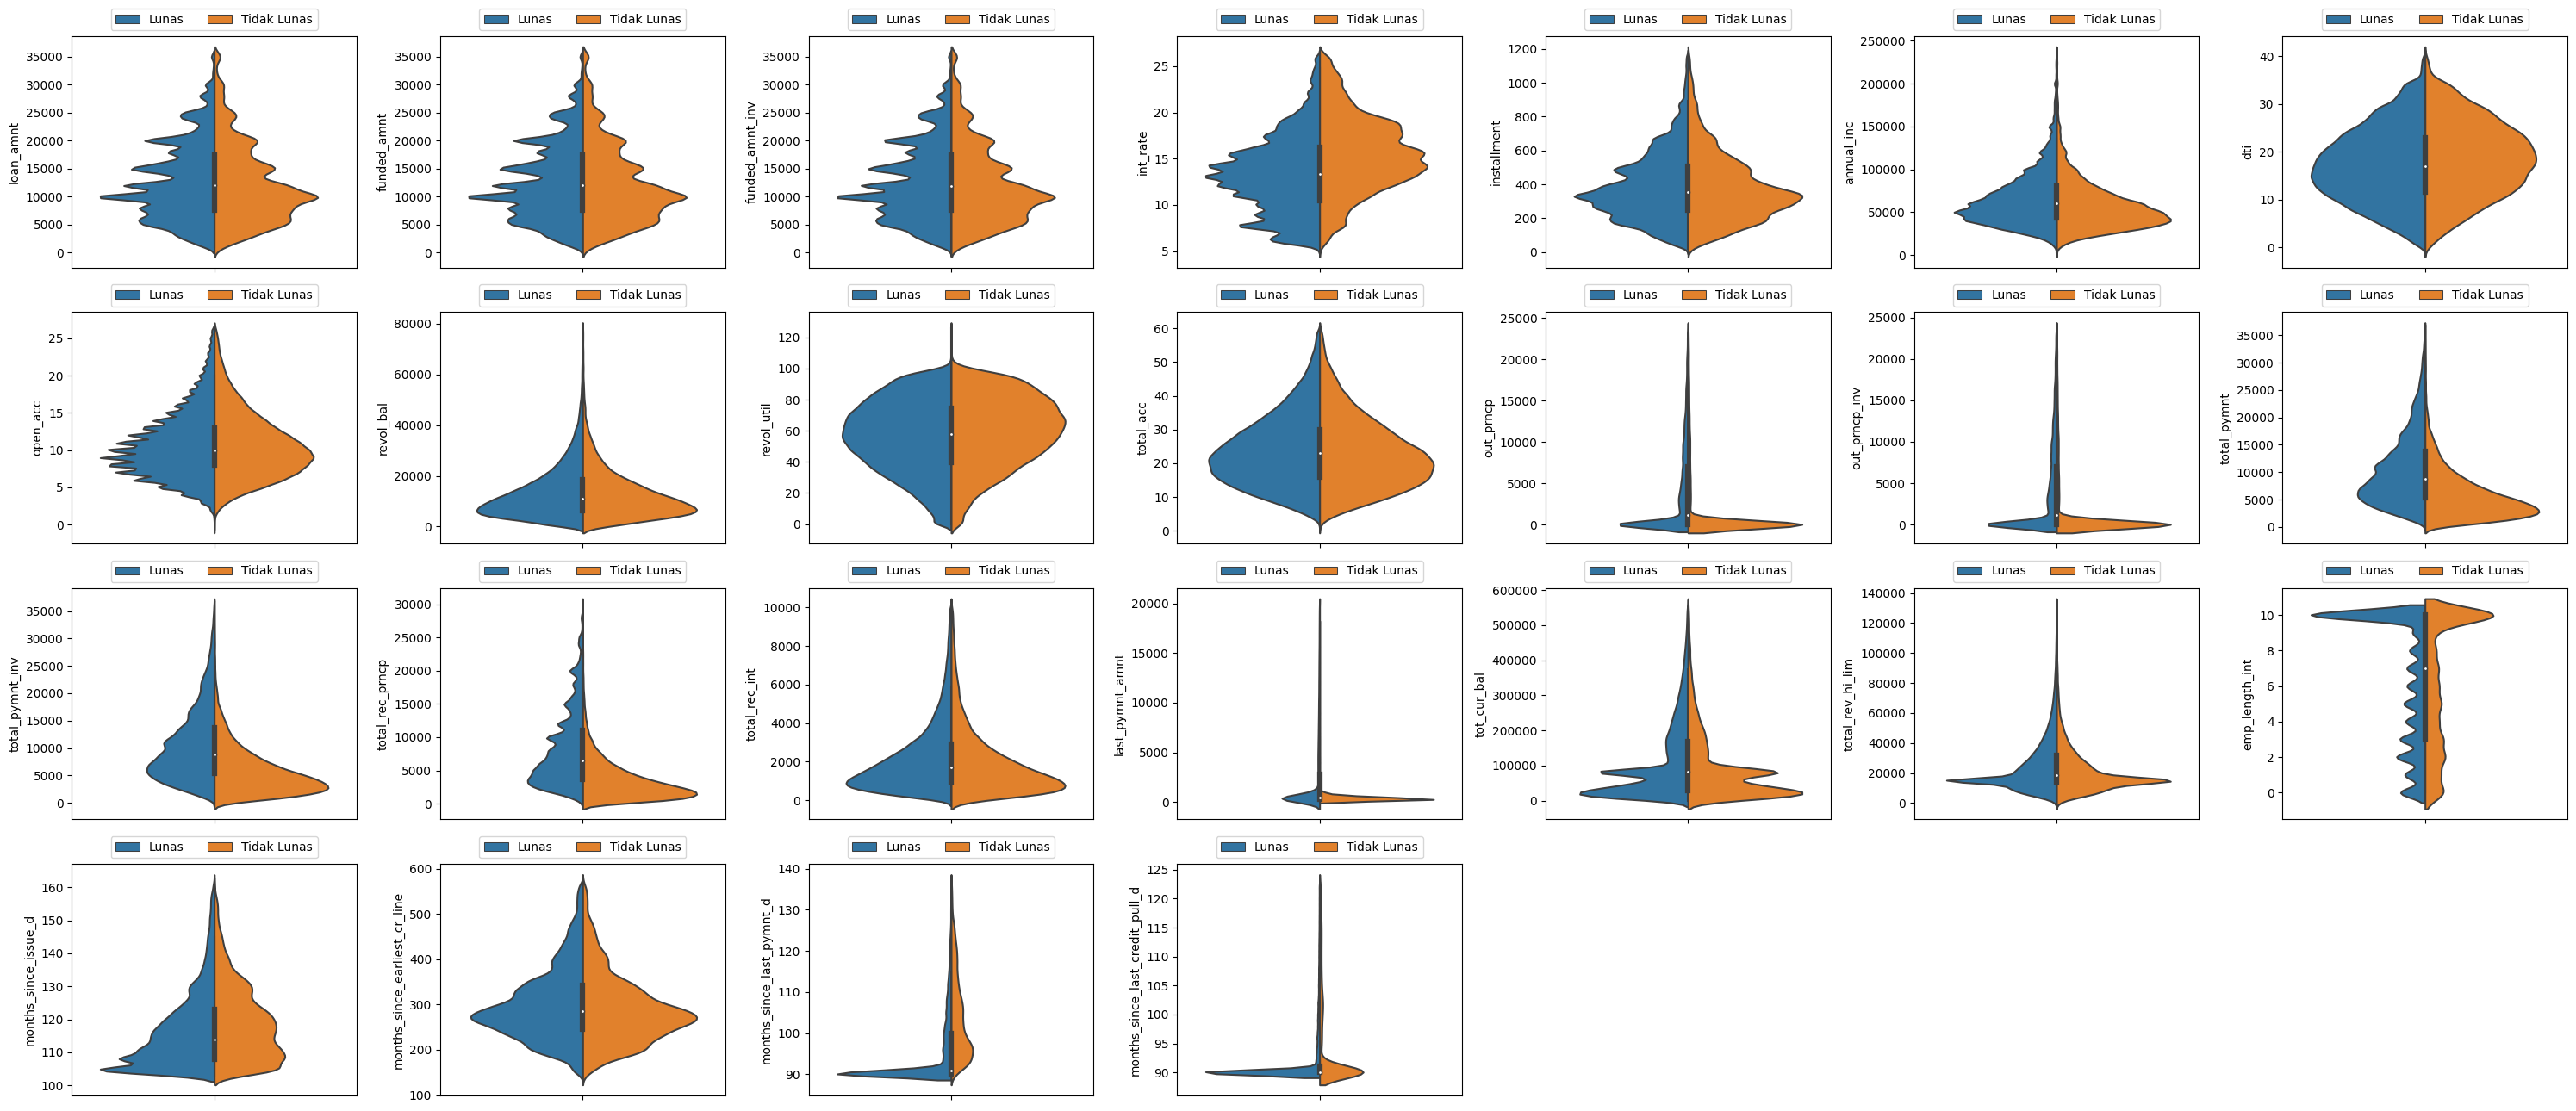

In [42]:
num_data = df.select_dtypes(exclude='object').drop('bad_loan',axis=1)
col = num_data.columns
df["all"] = ""

plt.figure(figsize=(30,13))
for i,j in enumerate(col):
  plt.subplot(4,7,i+1)
  sns.violinplot(x="all", y=j, hue="status", data=df, split=True)
  plt.xlabel("")
  plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
  plt.tight_layout()

df.drop('all', axis = 1, inplace = True)

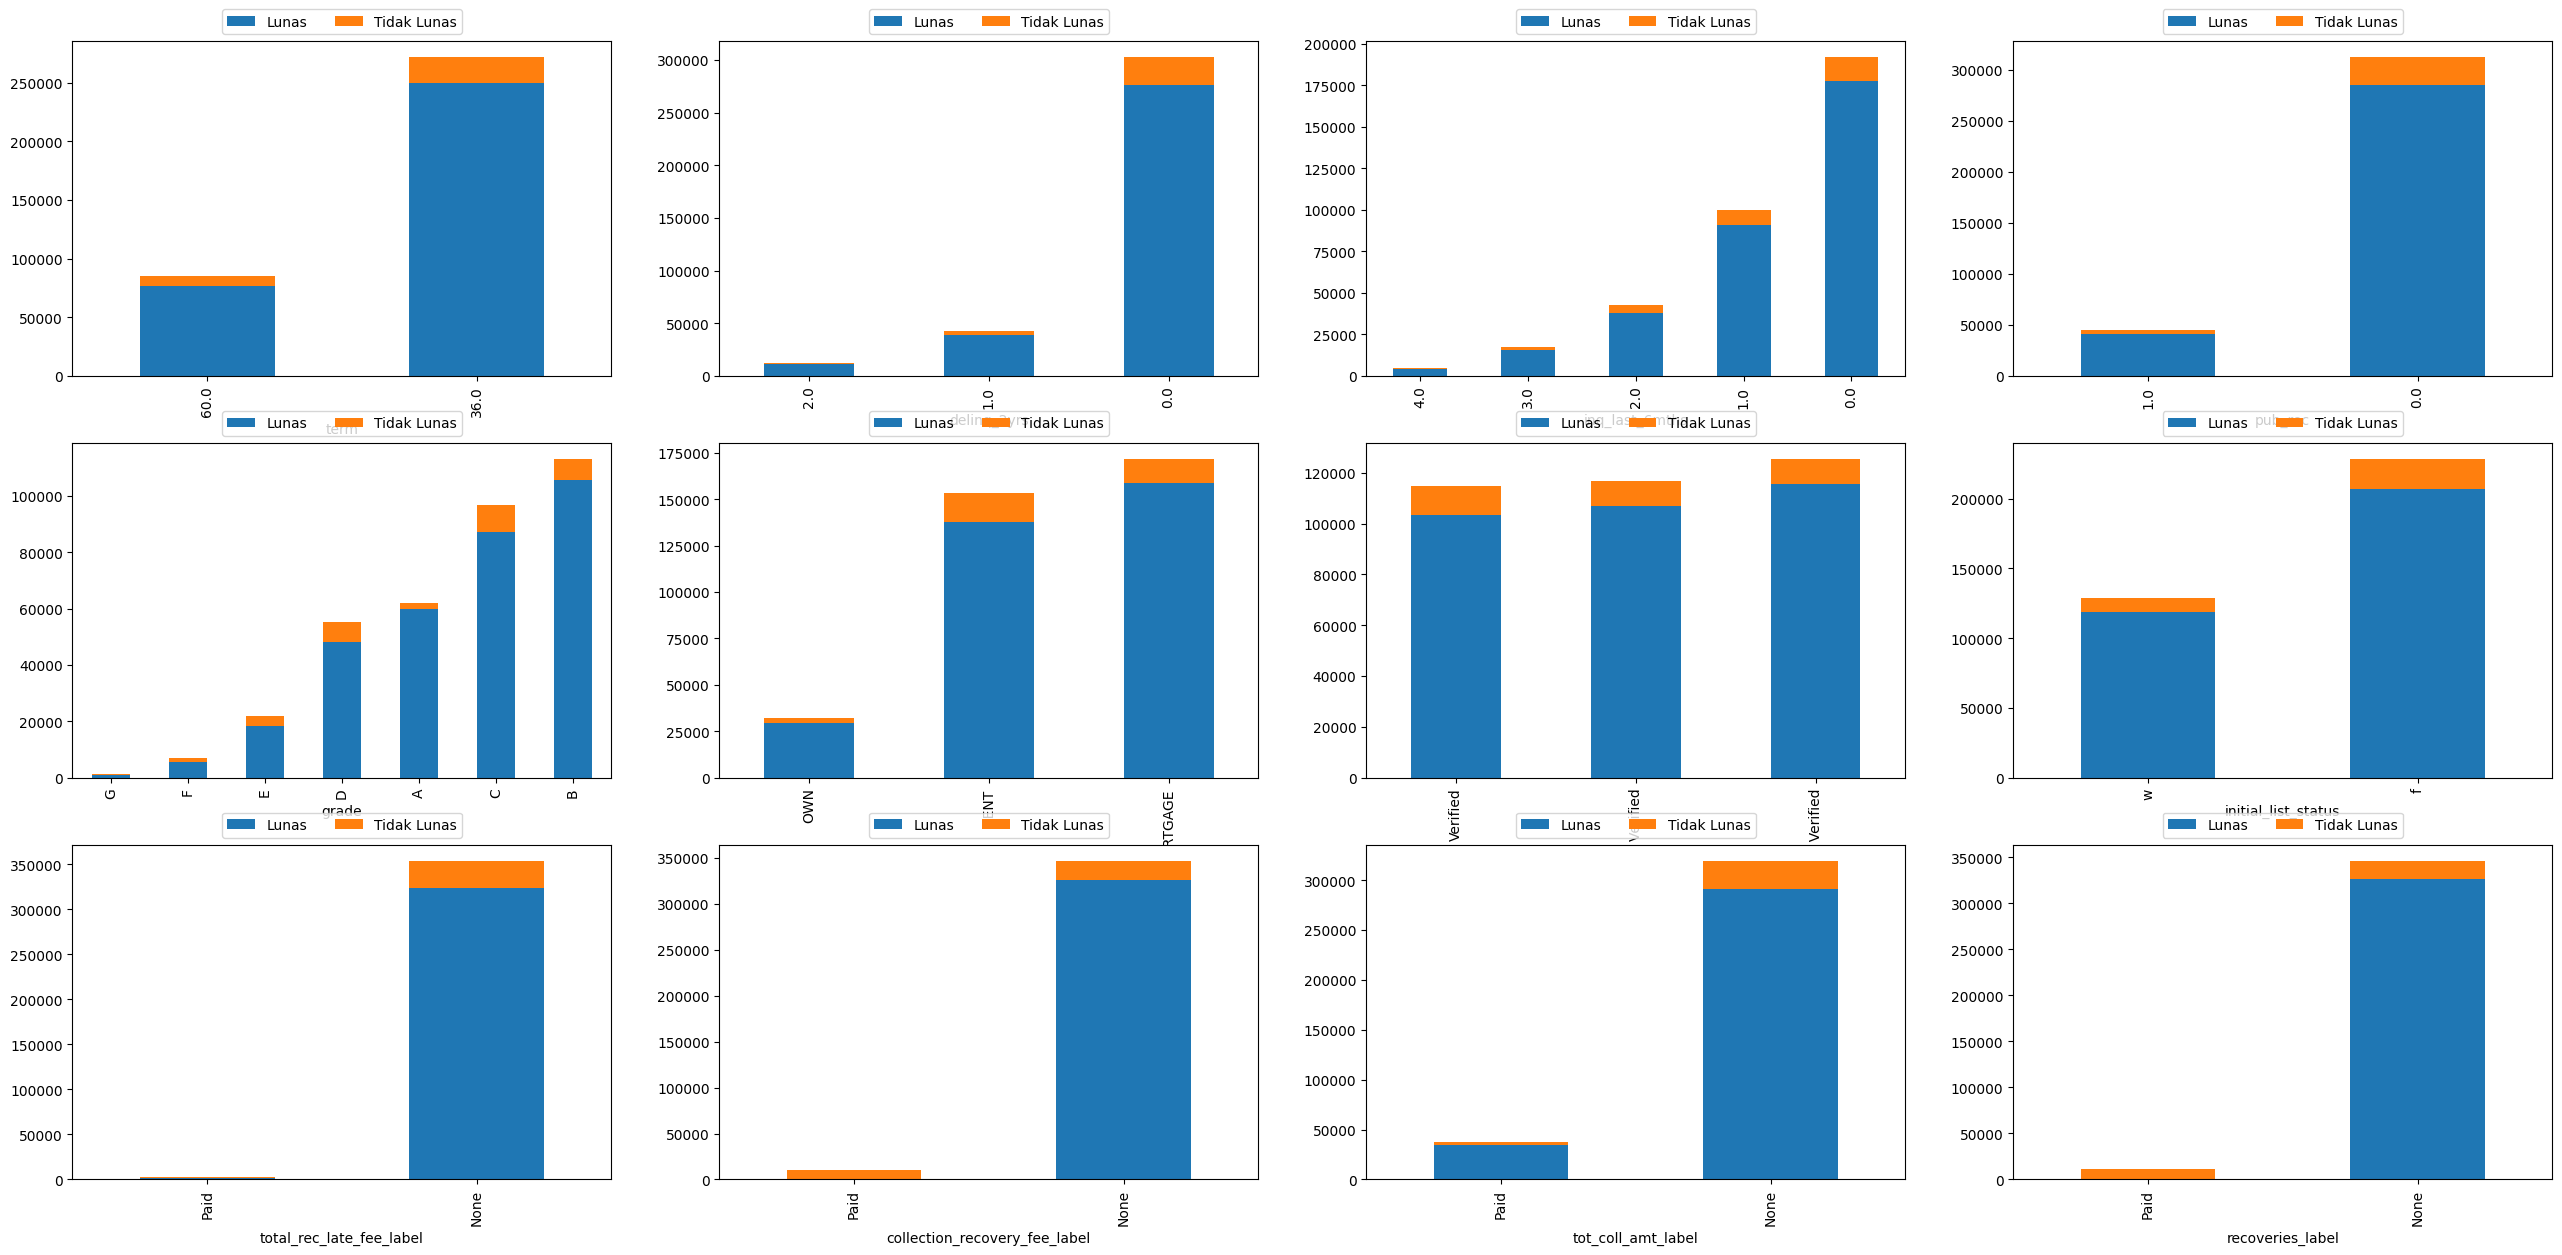

In [43]:
cat_data = df.select_dtypes(include='object').drop(['status','purpose','addr_state'],axis=1)
col = cat_data.columns

fig = plt.figure(figsize=(32, 20))
for i,j in enumerate(col,start=1):
  ax = plt.subplot(4,4,i)
  pd.crosstab(df[j],df['status']).sort_values(by=['Lunas']).plot.bar(stacked=True,ax=ax)
  plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
  plt.xticks()

In [44]:
df.drop('collection_recovery_fee_label', axis=1, inplace=True)

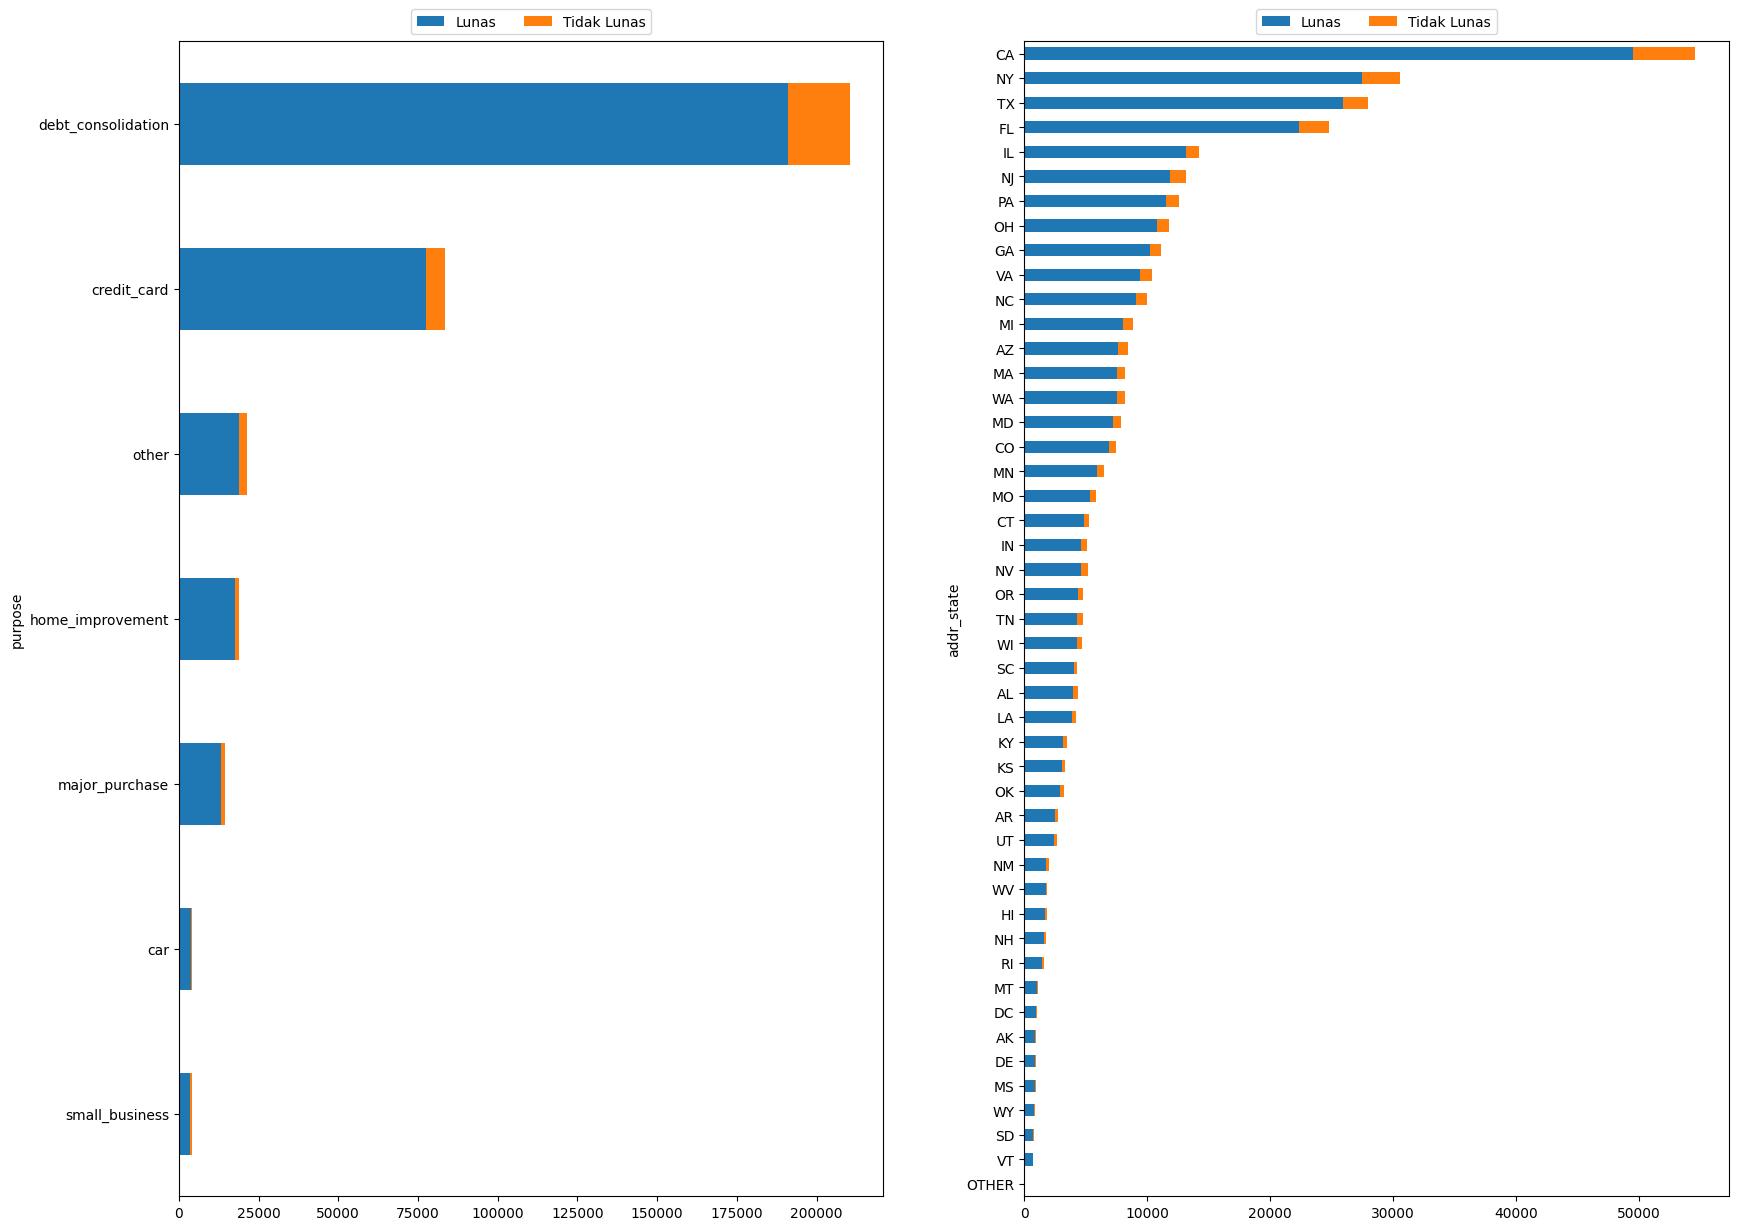

In [45]:
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(121)
pd.crosstab(df['purpose'], df['status']).sort_values(by=['Lunas']).plot.barh(stacked=True,ax=ax)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
#plt.xticks(rotation='0')

ax = plt.subplot(122)
pd.crosstab(df['addr_state'], df['status']).sort_values(by=['Lunas']).plot.barh(stacked=True,ax=ax)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
#plt.xticks(rotation='0')

Analisis bivariat

Anova test

In [46]:
x = df.select_dtypes(exclude='object').drop('bad_loan',axis=1)
y = df['status']
col_num = x.columns

from sklearn.feature_selection import f_classif
fval,pval = f_classif(x,y)
for i,j in enumerate(col_num): 
  print('pvalue variabel {} = {}'.format(j,round(pval[i],3)))

pvalue variabel loan_amnt = 0.0
pvalue variabel funded_amnt = 0.0
pvalue variabel funded_amnt_inv = 0.0
pvalue variabel int_rate = 0.0
pvalue variabel installment = 0.0
pvalue variabel annual_inc = 0.0
pvalue variabel dti = 0.0
pvalue variabel open_acc = 0.021
pvalue variabel revol_bal = 0.0
pvalue variabel revol_util = 0.0
pvalue variabel total_acc = 0.0
pvalue variabel out_prncp = 0.0
pvalue variabel out_prncp_inv = 0.0
pvalue variabel total_pymnt = 0.0
pvalue variabel total_pymnt_inv = 0.0
pvalue variabel total_rec_prncp = 0.0
pvalue variabel total_rec_int = 0.0
pvalue variabel last_pymnt_amnt = 0.0
pvalue variabel tot_cur_bal = 0.0
pvalue variabel total_rev_hi_lim = 0.0
pvalue variabel emp_length_int = 0.0
pvalue variabel months_since_issue_d = 0.0
pvalue variabel months_since_earliest_cr_line = 0.0
pvalue variabel months_since_last_pymnt_d = 0.0
pvalue variabel months_since_last_credit_pull_d = 0.0


Kesimpulan:

Seluruh variabel prediktor numerik signifikansi < 0.05 yang artinya ternyata terdapat perbedaan rata-rata antara label target yang diuji. Sehingga terdapat pengaruh semua variabel prediktor numerik terhadap status kredit.

Chi Square Test

In [47]:
x = df.select_dtypes(include='object').drop('status',axis=1)
y = df['status']
col_kat = x.columns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for i in col_kat:
  x_cat = LabelEncoder().fit_transform(df[i]).reshape(-1,1)
  fval,pval = chi2(x_cat,y)
  print('pvalue variabel {} = {}'.format(i,pval))
  #print(i,pval)

pvalue variabel term = [1.70539657e-82]
pvalue variabel delinq_2yrs = [0.00314459]
pvalue variabel inq_last_6mths = [4.91389461e-299]
pvalue variabel pub_rec = [0.06204416]
pvalue variabel grade = [0.]
pvalue variabel home_ownership = [4.70518872e-172]
pvalue variabel verification_status = [2.07096688e-59]
pvalue variabel purpose = [1.66919021e-58]
pvalue variabel addr_state = [3.17195947e-42]
pvalue variabel initial_list_status = [9.99677159e-44]
pvalue variabel total_rec_late_fee_label = [0.]
pvalue variabel tot_coll_amt_label = [0.0003353]
pvalue variabel recoveries_label = [0.]


Kesimpulan:

Hampir seluruh variabel prediktor kategorik (kecuali: pub_rec) sign < 0.05 yang artinya terdapat perbedaan rata-rata antara label target. Sehingga terdapat pengaruh hampir semua var prediktor kategorik terhadap status kredit.

Berdasarkan analisis bivariat, perlu dilakukan analisis multivariat untuk melihat hubungan antar variabel.

/tmp/ipykernel_198/3191099627.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: >

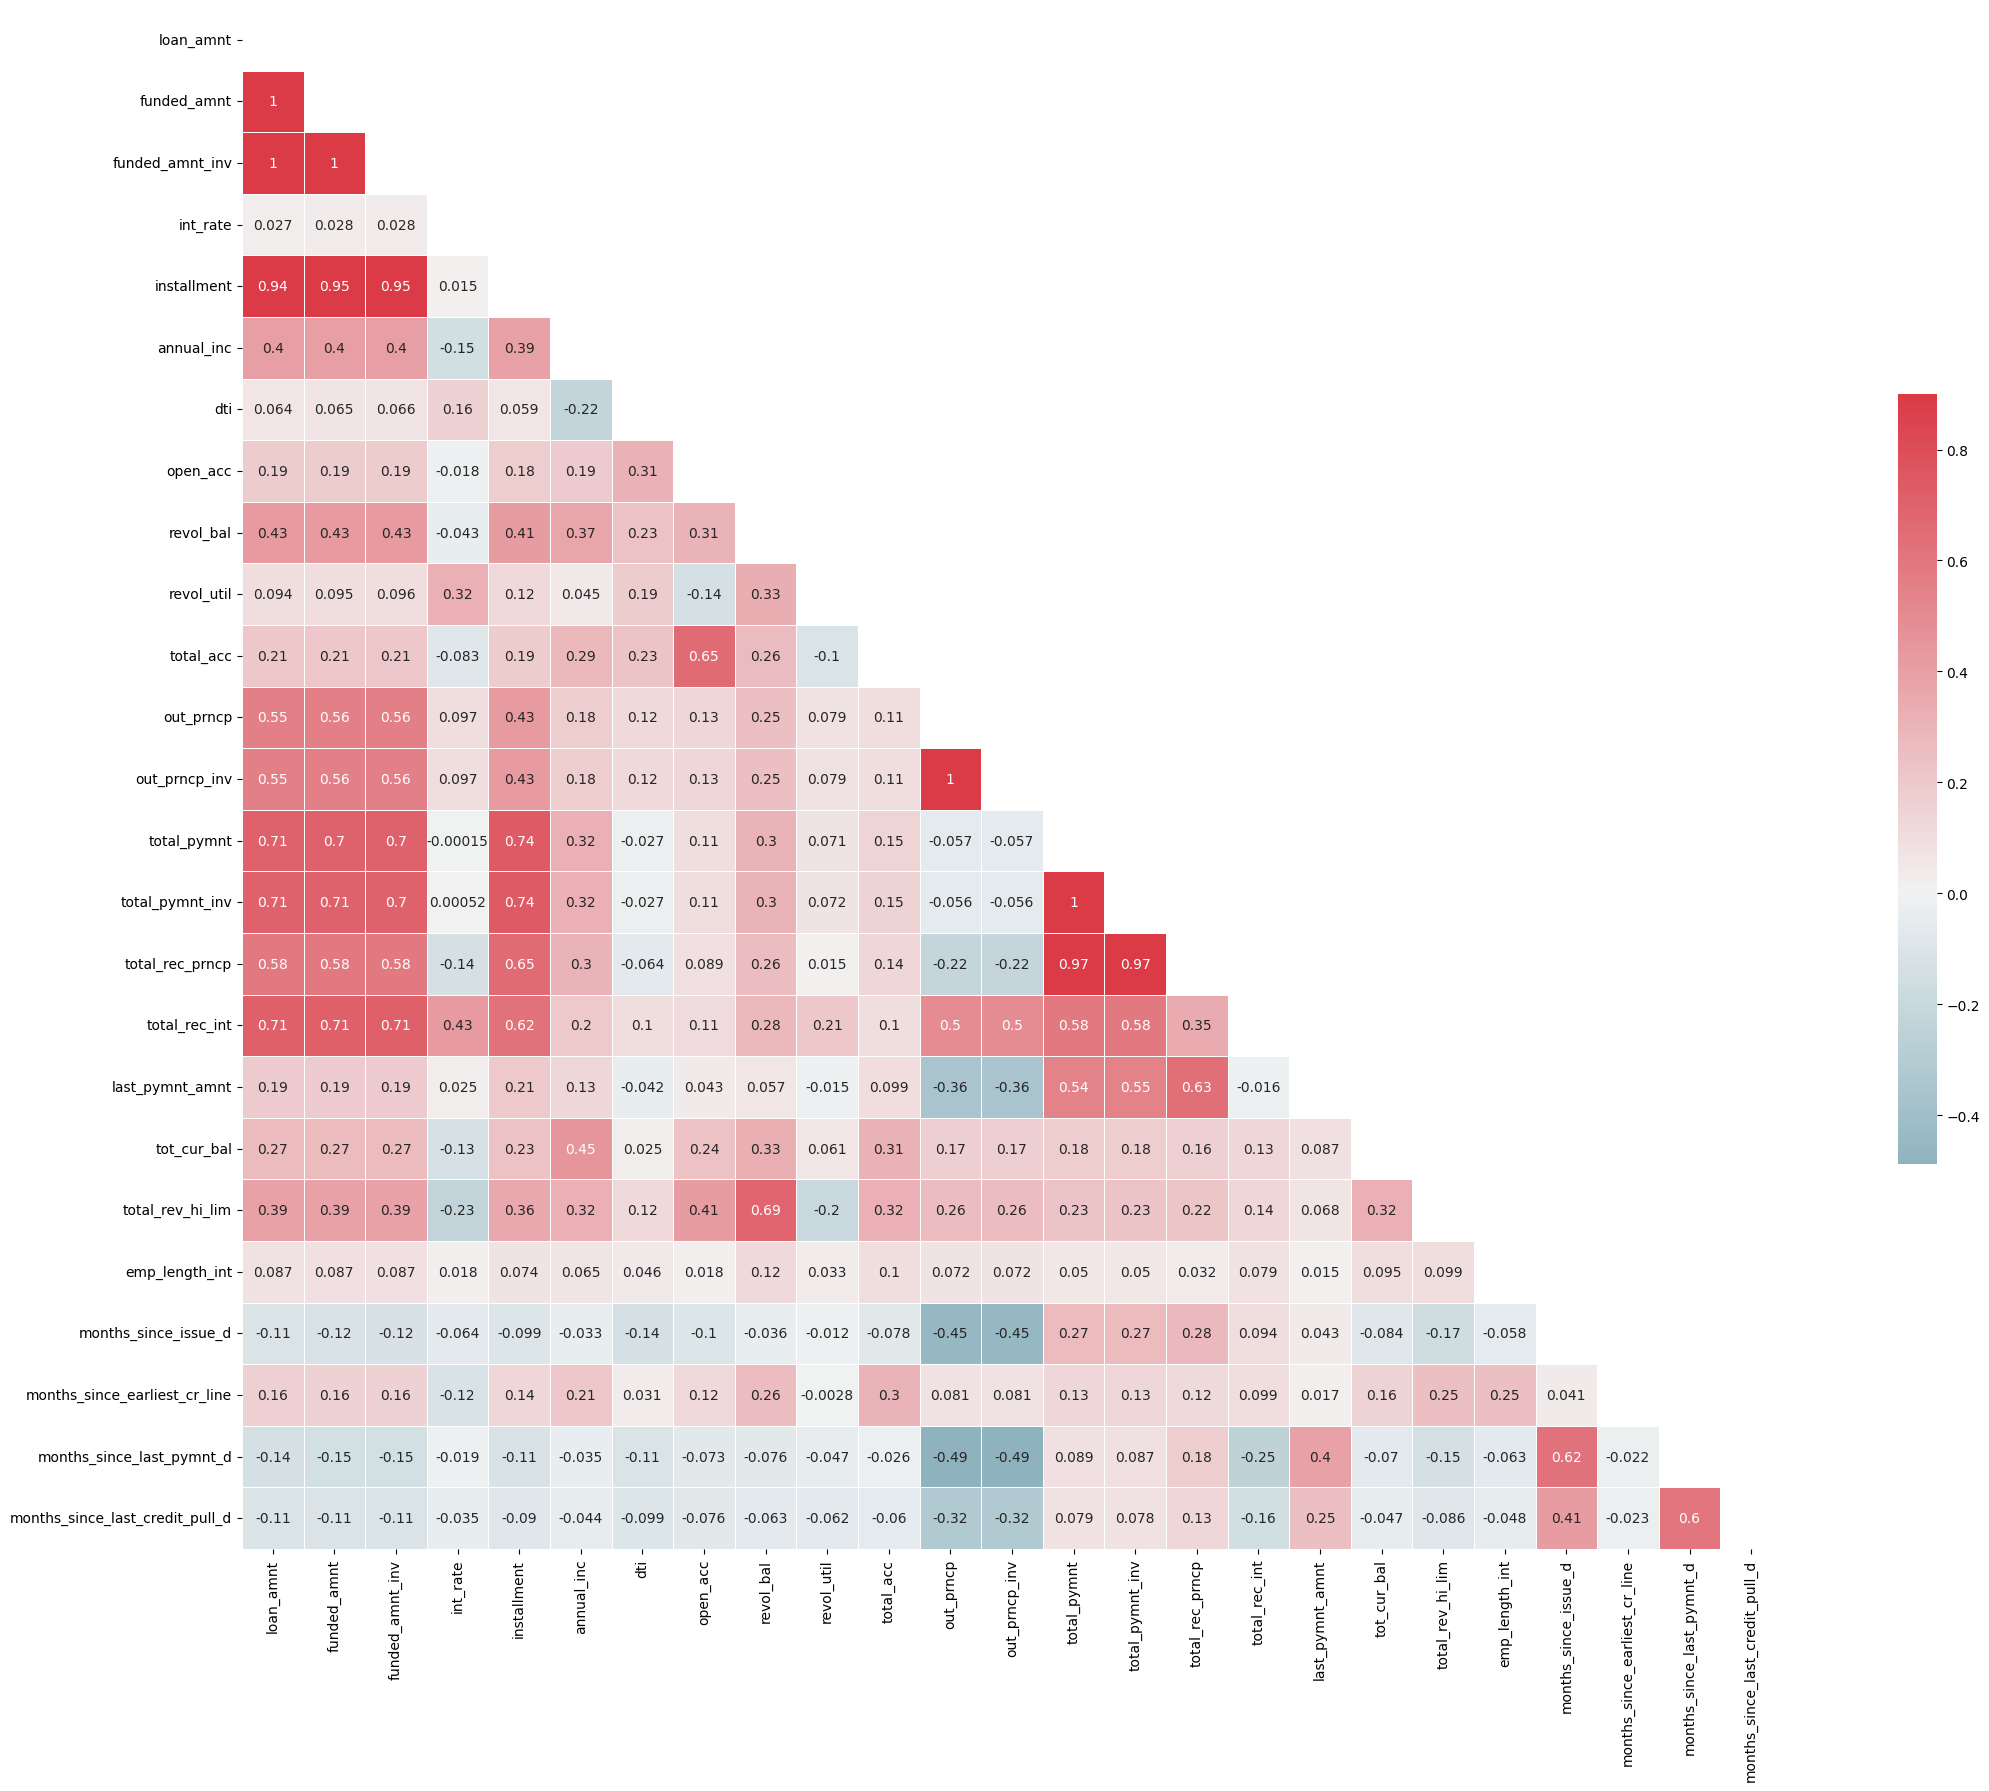

In [48]:
data = df.select_dtypes(exclude='object').drop('bad_loan',axis=1)
#pd.plotting.scatter_matrix(df, alpha=0.8, diagonal='kde', figsize=(30, 20));

corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Terdapat beberapa pasangan fitur yang memiliki korelasi lebih dari 0.7 sehingga akan diambil salah satu saja.

In [49]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.7)]
high_corr

/tmp/ipykernel_198/4121603476.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int']

In [50]:
df.drop(high_corr, axis=1, inplace=True)

In [51]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'last_pymnt_amnt', 'tot_cur_bal',
       'total_rev_hi_lim', 'bad_loan', 'emp_length_int',
       'months_since_issue_d', 'months_since_earliest_cr_line',
       'months_since_last_pymnt_d', 'months_since_last_credit_pull_d', 'grade',
       'home_ownership', 'verification_status', 'purpose', 'addr_state',
       'initial_list_status', 'status', 'total_rec_late_fee_label',
       'tot_coll_amt_label', 'recoveries_label'],
      dtype='object')

## Data Preprocessing

Label Encoding

In [52]:
df['grade'] = df['grade'].astype('category').cat.codes

One-hot encoding

In [53]:
cat_data = df.select_dtypes(include='object').drop('status',axis=1)
cat_col = cat.columns.tolist()

onehot = pd.get_dummies(df[cat_col], drop_first=True)
categorical = pd.concat([onehot,df['grade']],axis=1)

Partisi data target-prediktor dan train-test

In [54]:
from sklearn.model_selection import train_test_split

numerical = data.select_dtypes(exclude='object')

X = pd.concat([numerical,categorical],axis=1)
y = df['bad_loan']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

Transformasi data

In [55]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

col_minmax = ['dti', 'open_acc', 'revol_util', 'total_acc', 'months_since_earliest_cr_line']
col_log = ['loan_amnt', 'int_rate', 'annual_inc', 'revol_bal', 'out_prncp', 'last_pymnt_amnt',
           'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int', 'months_since_issue_d',
           'months_since_last_pymnt_d', 'months_since_last_credit_pull_d']

#MinMax Transformation
minmaxSC = MinMaxScaler()
X_train.loc[:, col_minmax] = minmaxSC.fit_transform(X_train.loc[:, col_minmax])
X_test.loc[:, col_minmax] = minmaxSC.transform(X_test.loc[:, col_minmax])

#Log Transformation
X_train.loc[:, col_log] = np.log1p(X_train.loc[:, col_log])
X_test.loc[:, col_log] = np.log1p(X_test.loc[:, col_log])
     

### Balance Target Label

In [56]:
y_train.value_counts()

0    228032
1     21992
Name: bad_loan, dtype: int64

Jumlah data lebih dari 10000 sehingga menggunakan teknik undersampling

In [57]:
pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomOverSampler(random_state=123)

X_resampled, y_resampled = under_sampler.fit_resample(X_train.values, y_train.ravel())
Counter(y_resampled)

Counter({0: 228032, 1: 228032})

In [59]:
col = X_train.columns.to_list()

X_train = pd.DataFrame(X_resampled, 
             columns=col)

y_train = pd.Series(y_resampled)

## Training Model

Comparing algorithm

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_train)
y_pred_dt_test = DTclassifier.predict(X_test)

GBclassifier = GradientBoostingClassifier()
GBclassifier.fit(X_train, y_train)
y_pred_gb = GBclassifier.predict(X_train)
y_pred_gb_test = GBclassifier.predict(X_test)

LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)
y_pred_lr = LRclassifier.predict(X_train)
y_pred_lr_test = LRclassifier.predict(X_test)

RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)
y_pred_rf = RFclassifier.predict(X_train)
y_pred_rf_test = RFclassifier.predict(X_test)

XTclassifier = ExtraTreesClassifier()
XTclassifier.fit(X_train, y_train)
y_pred_xt = XTclassifier.predict(X_train)
y_pred_xt_test = XTclassifier.predict(X_test)

/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.metrics import accuracy_score

algorithm = ['RandomForest','LogisticRegression','Xtree','DecisionTree','GradientBoost']
pred_train = [y_pred_rf, y_pred_lr, y_pred_xt, y_pred_dt, y_pred_gb]
pred_test = [y_pred_rf_test, y_pred_lr_test, y_pred_xt_test, y_pred_dt_test, y_pred_gb_test]

train_set_accuracy = []
test_set_accuracy = []

for i in pred_train:
  train_set_accuracy.append(accuracy_score(y_train, i))

for i in pred_test:
  test_set_accuracy.append(accuracy_score(y_test, i))

n = list(zip(algorithm, train_set_accuracy, test_set_accuracy))
pd.DataFrame(n, columns = ['Model','Akurasi Train', 'Akurasi Test']).sort_values(['Akurasi Train'],ascending=False)

,Model,Akurasi Train,Akurasi Test
0,RandomForest,1.000000,0.995968
2,Xtree,1.000000,0.991573
3,DecisionTree,1.000000,0.992049
4,GradientBoost,0.980132,0.993915
1,LogisticRegression,0.906890,0.972479


<AxesSubplot: title={'center': 'Feature Importance of Random Forest Model'}>

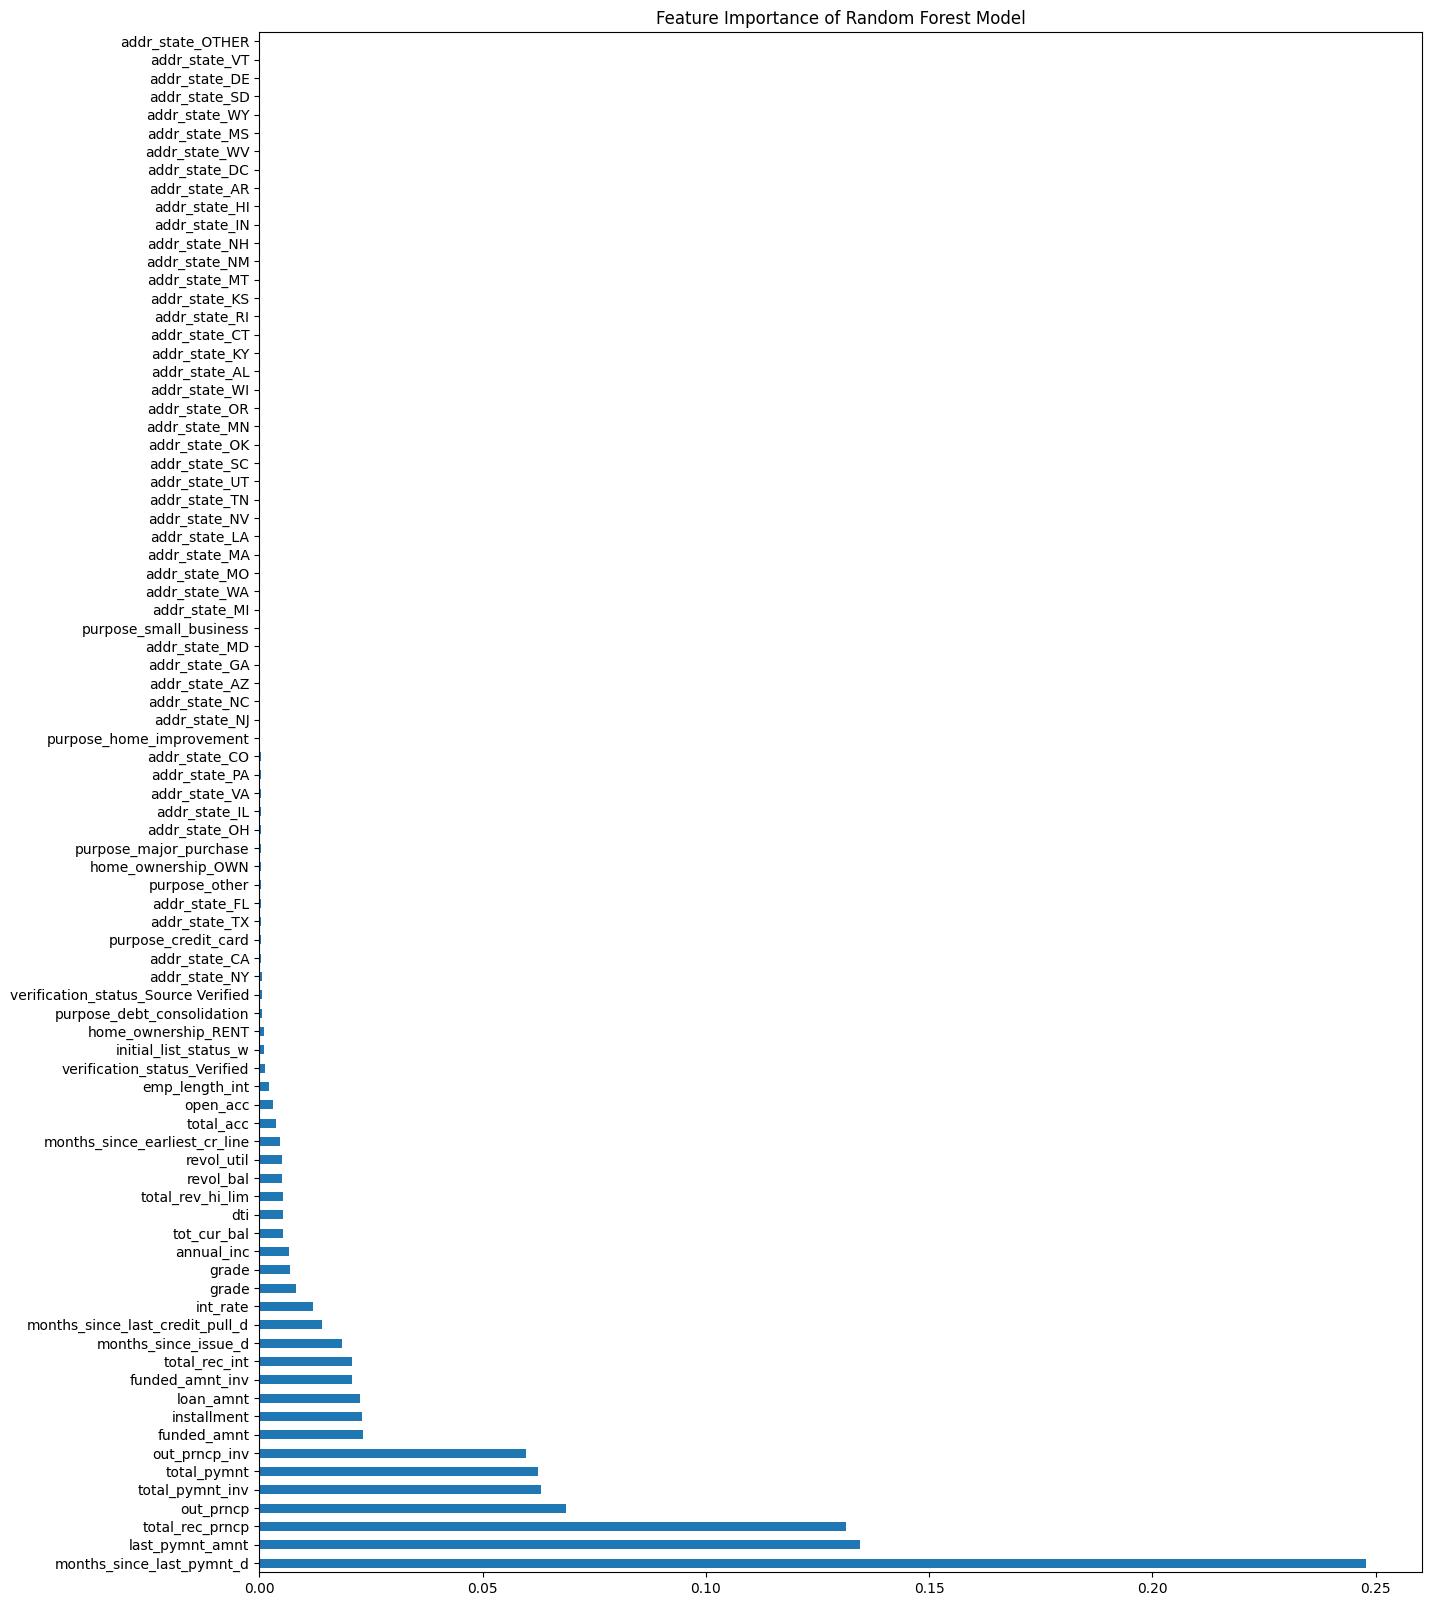

In [62]:
featimp = pd.Series(RFclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15,20))
featimp.plot(kind='barh', title='Feature Importance of Random Forest Model')

In [63]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'months_since_issue_d', 'months_since_earliest_cr_line',
       'months_since_last_pymnt_d', 'months_since_last_credit_pull_d', 'grade',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_other',
       'purpose_small_business', 'addr_state_AL', 'addr_state_AR',
       'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA',
       'addr_stat

In [66]:
col = ['months_since_last_pymnt_d','last_pymnt_amnt','out_prncp','months_since_last_credit_pull_d','months_since_issue_d',
       'int_rate','annual_inc','loan_amnt','grade','tot_cur_bal','dti','total_rev_hi_lim','revol_bal','revol_util','months_since_earliest_cr_line',
       'total_acc','open_acc','emp_length_int','initial_list_status_w','home_ownership_RENT']

Cek Overfitting

In [67]:
X_train2 = X_train[col]
X_test2 = X_test[col]

RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train2, y_train)
y_pred_rf = RFclassifier.predict(X_train2)
y_pred_rf_test = RFclassifier.predict(X_test2)

print('Akurasi Train',accuracy_score(y_train, y_pred_rf))
print('Akurasi Test',accuracy_score(y_test, y_pred_rf_test))

Akurasi Train 1.0
Akurasi Test 0.9843496276387256


## Evaluasi Model


True Positives(TP) =  96899
True Negatives(TN) =  8578
False Positives(FP) =  824
False Negatives(FN) =  853




<AxesSubplot: >

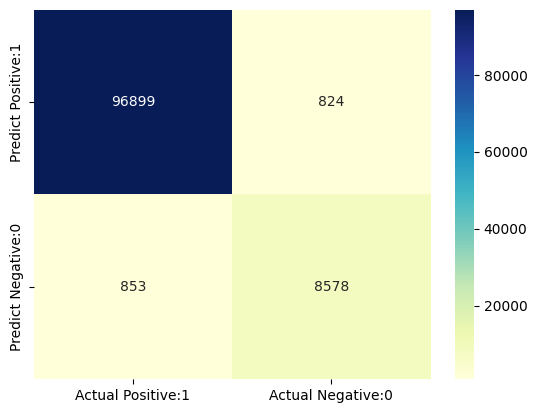

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_test)

print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('\n')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [69]:
TP = cm[0,0] #true positif
TN = cm[1,1] #true negatif
FP = cm[0,1] #false positif
FN = cm[1,0] #false negatif

Tampilkan akurasi, presisi dan sensitivitas

In [70]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Akurasi Klasifikasi : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('\nKesalahan Klasifikasi : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('\nPresisi : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nSensitivitas : {0:0.4f}'.format(recall))

Akurasi Klasifikasi : 0.9843

Kesalahan Klasifikasi : 0.0157

Presisi : 0.9916

Sensitivitas : 0.9913


roc-auc

In [71]:
from sklearn.metrics import roc_curve, precision_recall_curve,auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9505608016343183


Text(0.5, 0, 'False Positive Rate')

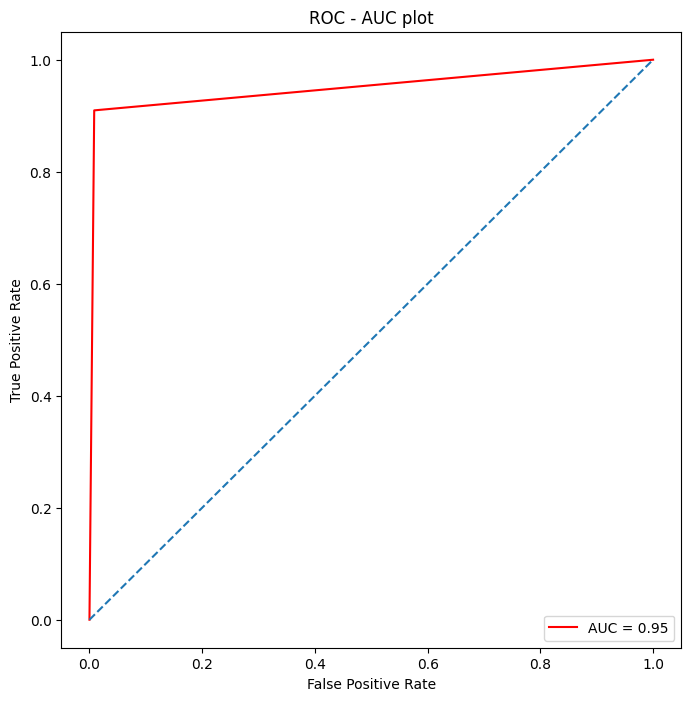

In [72]:
plt.figure(figsize=(8,8))

plt.title('ROC - AUC plot')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
     

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d86829cf-bd61-40d0-8b8f-1646fb7e4652' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>